# Thyroid data analysis A to Z

The purpose of this script is to predict ...

To this end, ...

- dataset url : https://archive.ics.uci.edu/ml/datasets/thyroid+disease

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

input_path_thyroid = '../../input/uci_thyroid'
col_names = [
    'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
    'psych', 'TSH', 'T3', 'TT4', 'T4U', 
    'FTI'
]
class_names = ['normal', 'hyper', 'hypo']
df_thyr = [
    pd.read_csv(
        f'{input_path_thyroid}/ann-{tag}.data', header=None, names=col_names+['class'],
        delim_whitespace=True
    )
    for tag in ['train', 'test']
]
df_thyr = pd.concat([
    pd.concat(df_thyr, axis=0, ignore_index=True), 
    pd.Series([0]*len(df_thyr[0]) + [1]*len(df_thyr[1]), name='test')
], axis=1)
df_thyr = df_thyr.drop_duplicates()
del df_thyr['hypopituitary']
# df_thyr['TSH_log'] = tsh_transform(df_thyr['TSH_log'])

df_thyr_train, df_thyr_test = df_thyr[df_thyr['test'] == 0], df_thyr[df_thyr['test'] == 1]

X_train, y_train = df_thyr_train.iloc[:, :-2], df_thyr_train['class']
X_test,  y_test  =  df_thyr_test.iloc[:, :-2],  df_thyr_test['class']

## Introduction

The dataset is messy. It consists of several sub-datasets which has distinct columns, labeling rule, etc. 

However, ...

Therefore, I used, ...

In [6]:
print('duplication test')
print(df_thyr_train.duplicated().value_counts() )
df_thyr_train = df_thyr_train.drop_duplicates()
df_thyr_train.shape
df_train, df_test = df_thyr_train[df_thyr_train['test'] == 0], df_thyr_train[df_thyr_train['test'] == 1]

print()
print(f'number of train samples : {df_train.shape[0]}')
print(f'number of  test samples : { df_test.shape[0]}')

duplication test
False    3709
dtype: int64

number of train samples : 3709
number of  test samples : 0


## Exploratory Data Analysis

We find duplicates. They are dropped before training.

KeyError: 'hypopituitary'

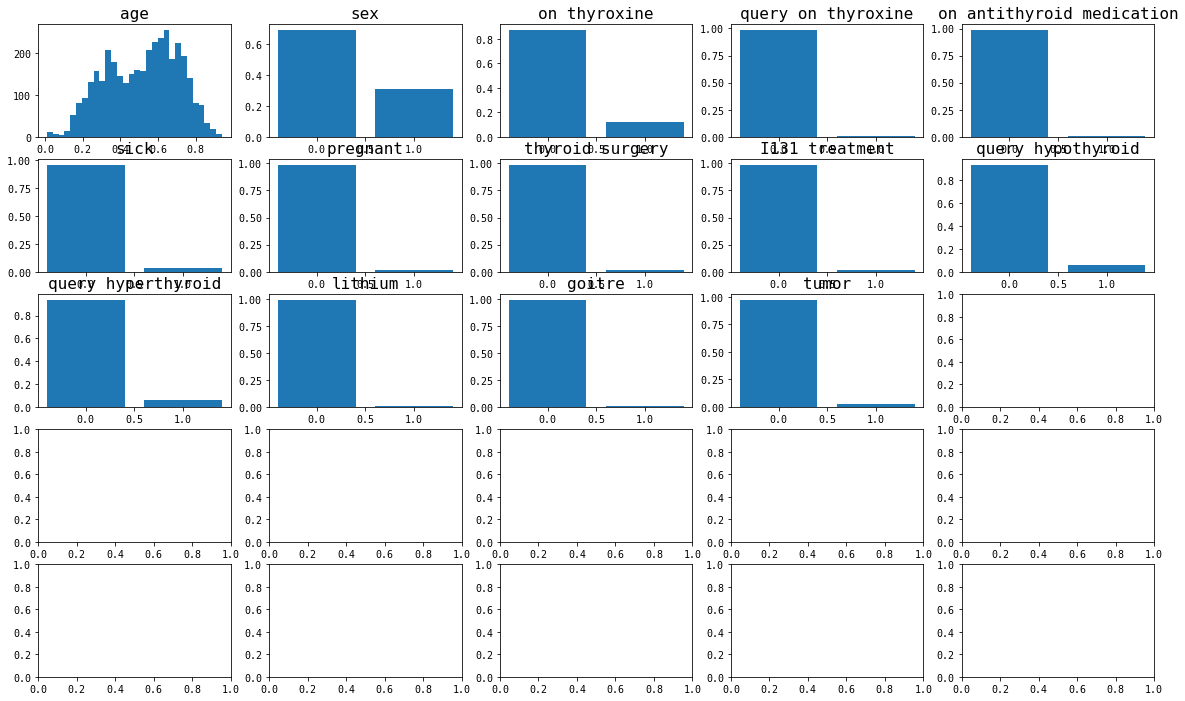

In [7]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 12))
axs = axs.ravel()
for num, name in enumerate(col_names):
    ax = axs[num]
    title = name
    ser = df_train[name]
    # if name in ['TSH']:
    #     ser = np.log(1e-5+ser)
    #     title = f'{name} (log scale)'
    _, bins = np.histogram(ser, bins=30)
    if name in ['TSH', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']:
        ax.hist(ser, bins=bins, color='C0')
    else:
        ax.bar(np.sort(ser.unique()), ser.value_counts(normalize=True).sort_index(), color='C0')
    ax.set_title(title, fontsize=16)

ax = axs[-2]
for j in range(1, 1+3):
    ax.bar([j], [(df_train['class'] == j).sum()], color='C0')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['normal', 'hyperthyroidism', 'hypothyroidism'])
ax.set_title('class distribution', fontsize=16)

ax = axs[-1]
ax.bar(['train', 'test'], [(df['test'] == 0).sum(), (df['test'] == 1).sum()], color='C0')
ax.set_title('size of train/test set', fontsize=16)

fig.suptitle('Frequency distribution in train set', fontsize=30)
plt.tight_layout()
plt.show(); plt.close()

Histogram above says ... And so ...

## Trying simple models

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = make_pipeline(
    PowerTransformer(),
    DecisionTreeClassifier(
        random_state=42
    )
)

model.fit(X_train, y_train)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test , model.predict(X_test )))

1.0
0.991812865497076


Whoa, simple tree approached accuracy score 99.1%. How about other models?

In [ ]:
## codes

## Model Optimization

Now I will stick to decision tree. Can we optimize the model?

In [ ]:
## codes

The final tree looks like:

In [9]:
## codes producing tree figure

On the other hand, other scores than accuracy is as follows.

## Discussion and conclusion

We have found appropriately tuned tree model is able to serve as machine diagnoser for thyroid diseases. 

Ulalah! ...